In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import time
import pandas as pd

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import load_img

#TO REMOVE WARNING MESSAGES
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

In [2]:
train_dir = r"C:\Users\nyans\Documents\Plant diseases detection\plant_disease_v2\plant_dataset_3"

batch_size = 32 
img_height = 256
img_width = 256

train_ds = tf.keras.utils.image_dataset_from_directory(
        train_dir,
        labels='inferred',
        label_mode='int',
        color_mode='grayscale',
        image_size=(img_height, img_width),
        shuffle=True,
        seed= 7,
        validation_split=0.3,
        subset="training",
        crop_to_aspect_ratio=False
)

valid_ds = tf.keras.utils.image_dataset_from_directory(
        train_dir,
        labels='inferred',
        label_mode='int',
        color_mode='grayscale',
        image_size=(img_height, img_width),
        shuffle=True,
        seed=7,
        validation_split=0.3,
        subset="validation",
        crop_to_aspect_ratio=False
)


Found 30905 files belonging to 4 classes.
Using 21634 files for training.
Found 30905 files belonging to 4 classes.
Using 9271 files for validation.


In [3]:
test_dir = r"C:\Users\nyans\Documents\Plant diseases detection\plant_disease_v2\testing files"
test_ds = tf.keras.utils.image_dataset_from_directory(
        test_dir,
        labels='inferred',
        label_mode='int',
        color_mode='grayscale',
        image_size=(img_height, img_width),
        shuffle=True,
        seed=7,
        validation_split=0.3,
        subset="validation",
        crop_to_aspect_ratio=False
)

Found 97 files belonging to 16 classes.
Using 29 files for validation.


In [4]:
class_names = train_ds.class_names
class_dic = {class_names.index(i) : i for i in class_names}
print(class_dic)

{0: 'apple', 1: 'corn', 2: 'potato', 3: 'tomato'}


In [5]:
# FOR MODEL BUILDING
def modelBuild(num_classes, channel):
    model = Sequential([
    layers.Resizing(img_height, img_width, input_shape=(img_height, img_width, channel)),
    layers.Rescaling(1./255, ),
    layers.RandomRotation(0.2),
    layers.Conv2D(16, kernel_size=(3, 3), padding='same', activation='relu'),           
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),                                              
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
    ])

    model.compile(optimizer='adam',
              loss="sparse_categorical_crossentropy",
              metrics=['accuracy'])

    return model


In [6]:
# FOR MODEL TRAINING

def modelTraining(model, train_ds, valid_ds):
    
    epochs=30
    
    callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                patience=5,
                                                restore_best_weights = True
                                            )
    
    history = model.fit(
        train_ds,
        validation_data=valid_ds,
        epochs=epochs,
        batch_size=batch_size,
        callbacks=[callback]
    )
    return history, model

In [7]:
# FOR PLOTING TRAINED MODEL ACCURACY AND LOSS

def history_graph(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.plot(acc, label='Training Accuracy')
    plt.plot(val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()


In [8]:
num_classes = len(class_names)

model_plant = modelBuild(num_classes, 1)
model_plant.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resizing (Resizing)         (None, 256, 256, 1)       0         
                                                                 
 rescaling (Rescaling)       (None, 256, 256, 1)       0         
                                                                 
 random_rotation (RandomRota  (None, 256, 256, 1)      0         
 tion)                                                           
                                                                 
 conv2d (Conv2D)             (None, 256, 256, 16)      160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      4

Epoch 1/30
677/677 [==============================] - 38s 50ms/step - loss: 0.9230 - accuracy: 0.6054 - val_loss: 0.7993 - val_accuracy: 0.7043
Epoch 2/30
677/677 [==============================] - 39s 58ms/step - loss: 0.5588 - accuracy: 0.7872 - val_loss: 0.4513 - val_accuracy: 0.8283
Epoch 3/30
677/677 [==============================] - 41s 61ms/step - loss: 0.3966 - accuracy: 0.8581 - val_loss: 0.9237 - val_accuracy: 0.7717
Epoch 4/30
677/677 [==============================] - 54s 80ms/step - loss: 0.3292 - accuracy: 0.8826 - val_loss: 0.5823 - val_accuracy: 0.8144
Epoch 5/30
677/677 [==============================] - 55s 81ms/step - loss: 0.2788 - accuracy: 0.9000 - val_loss: 0.2997 - val_accuracy: 0.8934
Epoch 6/30
677/677 [==============================] - 40s 59ms/step - loss: 0.2436 - accuracy: 0.9155 - val_loss: 0.2904 - val_accuracy: 0.9010
Epoch 7/30
677/677 [==============================] - 40s 59ms/step - loss: 0.2173 - accuracy: 0.9220 - val_loss: 0.3582 - val_accuracy:

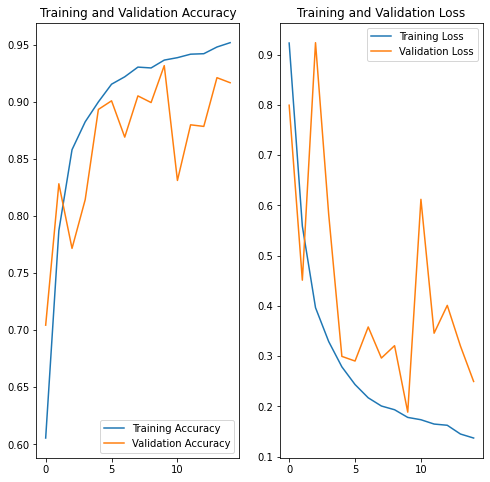

In [9]:
start = time.time()
history_plant, model_plant = modelTraining(model_plant, train_ds, valid_ds)
end = time.time()
plant_train_time = end-start

history_graph(history_plant)

In [11]:
# model_plant = modelBuild(num_classes, 1)
# history_plant, model_plant = modelTraining(model_plant, train_ds, valid_ds)
# history_graph(history_plant)
# model_plant.save('saved_model/plant_classify_model')

In [10]:
model_plant.save('saved_model/plant_classify_model')

In [11]:
model2 = tf.keras.models.load_model('saved_model/plant_classify_model')
result = model2.evaluate(valid_ds)

290/290 [==============================] - 25s 84ms/step - loss: 0.1888 - accuracy: 0.9318


In [12]:
# PLANT CLASS CLASSIFICATION TESTING

path = r"C:\Users\nyans\Documents\Plant diseases detection\plant_disease_v2\plant_dataset_3\tomato\Tomato___Leaf_Mold\3a0fc986-02fd-42fd-a1e8-9a1d6e635fb0___Crnl_L.Mold 8969.JPG"

img = load_img(path, target_size=(img_height, img_width))

img_array = tf.keras.utils.img_to_array(img)
print(img_array.shape)

gray_img_array = tf.image.rgb_to_grayscale(img_array)
gray_img_array = tf.expand_dims(gray_img_array, 0)

img_array = tf.expand_dims(img_array, 0)

pred = model2.predict(gray_img_array)
score = tf.nn.softmax(pred)
    
print("{} : {:.2f} % ".format(class_dic[np.argmax(score)], 100 * np.max(score)))

(256, 256, 3)
1/1 [==============================] - 0s 163ms/step
tomato : 46.89 % 


In [13]:
print(img_array.shape)
print(gray_img_array.shape)


(1, 256, 256, 3)
(1, 256, 256, 1)


In [14]:
#TO MAKE DATASET FOR EACH PLANT CLASS

def img_preprocess(train_dir):
    

    train_ds = tf.keras.utils.image_dataset_from_directory(
        train_dir,
        labels='inferred',
        label_mode='int',
        color_mode='rgb',
        batch_size= batch_size,
        image_size=(img_height, img_width),
        shuffle=True,
        seed= 7,
        validation_split=0.3,
        subset="training",
        crop_to_aspect_ratio=False,
    )

    valid_ds = tf.keras.utils.image_dataset_from_directory(
        train_dir,
        labels='inferred',
        label_mode='int',
        color_mode='rgb',
        batch_size= batch_size,
        image_size=(img_height, img_width),
        shuffle=True,
        seed=7,
        validation_split=0.3,
        subset="validation",
        crop_to_aspect_ratio=False,
    )
    return train_ds, valid_ds

Found 7969 files belonging to 4 classes.
Using 5579 files for training.
Found 7969 files belonging to 4 classes.
Using 2390 files for validation.
{0: 'Apple___Apple_scab', 1: 'Apple___Black_rot', 2: 'Apple___Cedar_apple_rust', 3: 'Apple___healthy'}
Epoch 1/30
175/175 [==============================] - 12s 56ms/step - loss: 0.9033 - accuracy: 0.6374 - val_loss: 0.5436 - val_accuracy: 0.7958
Epoch 2/30
175/175 [==============================] - 9s 52ms/step - loss: 0.5013 - accuracy: 0.8159 - val_loss: 0.5584 - val_accuracy: 0.8163
Epoch 3/30
175/175 [==============================] - 9s 52ms/step - loss: 0.3996 - accuracy: 0.8510 - val_loss: 0.3413 - val_accuracy: 0.8849
Epoch 4/30
175/175 [==============================] - 13s 74ms/step - loss: 0.3209 - accuracy: 0.8860 - val_loss: 0.5135 - val_accuracy: 0.8213
Epoch 5/30
175/175 [==============================] - 9s 51ms/step - loss: 0.2451 - accuracy: 0.9201 - val_loss: 0.2542 - val_accuracy: 0.9176
Epoch 6/30
175/175 [==============

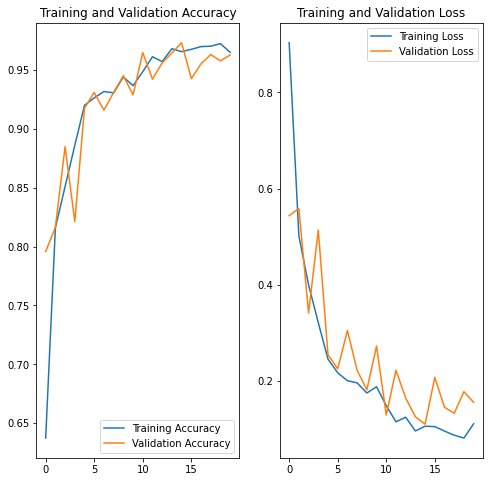

In [15]:
#FOR APPLE

apple_dir = r"C:\Users\nyans\Documents\Plant diseases detection\plant_disease_v2\plant_dataset_3\apple"
apple_train_ds, apple_valid_ds = img_preprocess(apple_dir)

apple_class_names = apple_train_ds.class_names
apple_class_dic = {apple_class_names.index(i) : i for i in apple_class_names}
print(apple_class_dic)

apple_num_classes = len(apple_class_names)
apple_model = modelBuild(apple_num_classes, 3)

#time taken to train
start = time.time()
history_apple, apple_model = modelTraining(apple_model, apple_train_ds, apple_valid_ds)
end = time.time()
apple_train_time = end-start

history_graph(history_apple)


In [16]:
apple_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resizing_1 (Resizing)       (None, 256, 256, 3)       0         
                                                                 
 rescaling_1 (Rescaling)     (None, 256, 256, 3)       0         
                                                                 
 random_rotation_1 (RandomRo  (None, 256, 256, 3)      0         
 tation)                                                         
                                                                 
 conv2d_3 (Conv2D)           (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 128, 128, 16)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 128, 128, 32)     

Found 9527 files belonging to 5 classes.
Using 6669 files for training.
Found 9527 files belonging to 5 classes.
Using 2858 files for validation.
{0: 'Tomato___Bacterial_spot', 1: 'Tomato___Early_blight', 2: 'Tomato___Late_blight', 3: 'Tomato___Leaf_Mold', 4: 'Tomato___healthy'}
Epoch 1/30
209/209 [==============================] - 13s 58ms/step - loss: 1.2566 - accuracy: 0.4683 - val_loss: 0.9707 - val_accuracy: 0.6966
Epoch 2/30
209/209 [==============================] - 11s 54ms/step - loss: 0.6961 - accuracy: 0.7437 - val_loss: 1.1449 - val_accuracy: 0.6655
Epoch 3/30
209/209 [==============================] - 12s 55ms/step - loss: 0.5419 - accuracy: 0.8084 - val_loss: 0.6607 - val_accuracy: 0.8111
Epoch 4/30
209/209 [==============================] - 12s 55ms/step - loss: 0.4125 - accuracy: 0.8478 - val_loss: 0.5491 - val_accuracy: 0.8230
Epoch 5/30
209/209 [==============================] - 11s 55ms/step - loss: 0.4145 - accuracy: 0.8493 - val_loss: 0.4011 - val_accuracy: 0.8754


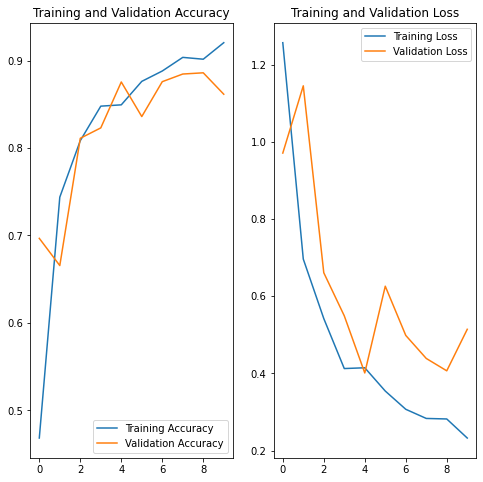

90/90 [==============================] - 2s 26ms/step - loss: 0.4011 - accuracy: 0.8754


[0.4010595381259918, 0.8754373788833618]

In [17]:
#FOR tomato

tomato_dir = r"C:\Users\nyans\Documents\Plant diseases detection\plant_disease_v2\plant_dataset_3\tomato"
tomato_train_ds, tomato_valid_ds = img_preprocess(tomato_dir)

tomato_class_names = tomato_train_ds.class_names
tomato_class_dic = {tomato_class_names.index(i) : i for i in tomato_class_names}
print(tomato_class_dic)

tomato_num_classes = len(tomato_class_names)
tomato_model = modelBuild(tomato_num_classes, 3)

start = time.time()
history_tomato, tomato_model = modelTraining(tomato_model, tomato_train_ds, tomato_valid_ds)
end = time.time()
tomato_train_time = end-start

history_graph(history_tomato)

tomato_model.evaluate(tomato_valid_ds)


Found 7573 files belonging to 4 classes.
Using 5302 files for training.
Found 7573 files belonging to 4 classes.
Using 2271 files for validation.
{0: 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 1: 'Corn_(maize)___Common_rust_', 2: 'Corn_(maize)___Northern_Leaf_Blight', 3: 'Corn_(maize)___healthy'}
Epoch 1/30
166/166 [==============================] - 11s 65ms/step - loss: 0.5412 - accuracy: 0.7820 - val_loss: 0.2657 - val_accuracy: 0.8882
Epoch 2/30
166/166 [==============================] - 14s 83ms/step - loss: 0.2839 - accuracy: 0.9040 - val_loss: 0.2848 - val_accuracy: 0.8952
Epoch 3/30
166/166 [==============================] - 25s 153ms/step - loss: 0.2152 - accuracy: 0.9236 - val_loss: 0.1899 - val_accuracy: 0.9370
Epoch 4/30
166/166 [==============================] - 20s 118ms/step - loss: 0.2302 - accuracy: 0.9212 - val_loss: 0.2045 - val_accuracy: 0.9194
Epoch 5/30
166/166 [==============================] - 9s 53ms/step - loss: 0.1989 - accuracy: 0.9332 - val_loss: 

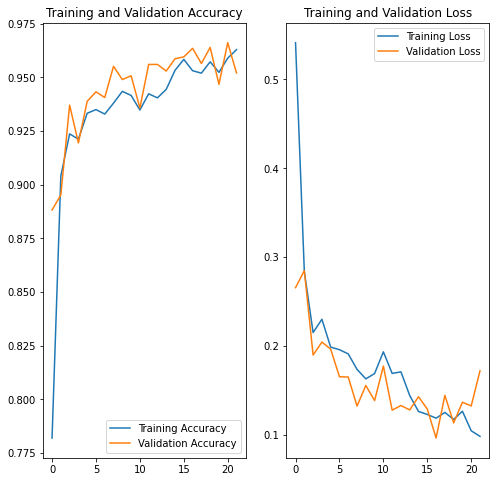

71/71 [==============================] - 2s 22ms/step - loss: 0.0966 - accuracy: 0.9635


[0.09662223607301712, 0.9634522199630737]

In [18]:
#FOR corn

corn_dir = r"C:\Users\nyans\Documents\Plant diseases detection\plant_disease_v2\plant_dataset_3\corn"
corn_train_ds, corn_valid_ds = img_preprocess(corn_dir)

corn_class_names = corn_train_ds.class_names
corn_class_dic = {corn_class_names.index(i) : i for i in corn_class_names}
print(corn_class_dic)

corn_num_classes = len(corn_class_names)
corn_model = modelBuild(corn_num_classes, 3)

start = time.time()
history_corn, corn_model = modelTraining(corn_model, corn_train_ds, corn_valid_ds)
end = time.time()
corn_train_time = end-start


history_graph(history_corn)

corn_model.evaluate(corn_valid_ds)

Found 5836 files belonging to 3 classes.
Using 4086 files for training.
Found 5836 files belonging to 3 classes.
Using 1750 files for validation.
{0: 'Potato___Early_blight', 1: 'Potato___Late_blight', 2: 'Potato___healthy'}
Epoch 1/30
128/128 [==============================] - 8s 56ms/step - loss: 0.8775 - accuracy: 0.6317 - val_loss: 1.2795 - val_accuracy: 0.6331
Epoch 2/30
128/128 [==============================] - 7s 53ms/step - loss: 0.3975 - accuracy: 0.8507 - val_loss: 1.3581 - val_accuracy: 0.6451
Epoch 3/30
128/128 [==============================] - 7s 53ms/step - loss: 0.2624 - accuracy: 0.9053 - val_loss: 0.6462 - val_accuracy: 0.7960
Epoch 4/30
128/128 [==============================] - 9s 67ms/step - loss: 0.2209 - accuracy: 0.9273 - val_loss: 1.3252 - val_accuracy: 0.7006
Epoch 5/30
128/128 [==============================] - 7s 55ms/step - loss: 0.1793 - accuracy: 0.9400 - val_loss: 0.3519 - val_accuracy: 0.8560
Epoch 6/30
128/128 [==============================] - 7s 54m

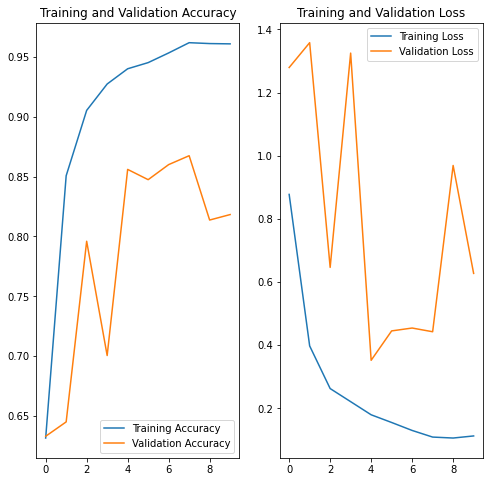

55/55 [==============================] - 1s 23ms/step - loss: 0.3519 - accuracy: 0.8560


[0.351949006319046, 0.8560000061988831]

In [19]:
#FOR potato

potato_dir = r"C:\Users\nyans\Documents\Plant diseases detection\plant_disease_v2\plant_dataset_3\potato"
potato_train_ds, potato_valid_ds = img_preprocess(potato_dir)

potato_class_names = potato_train_ds.class_names
potato_class_dic = {potato_class_names.index(i) : i for i in potato_class_names}
print(potato_class_dic)

potato_num_classes = len(potato_class_names)
potato_model = modelBuild(potato_num_classes, 3)

start = time.time()
history_potato, potato_model = modelTraining(potato_model, potato_train_ds, potato_valid_ds)
end = time.time()
potato_train_time = end-start

history_graph(history_potato)

potato_model.evaluate(potato_valid_ds)

In [20]:
plant_val_accuracy = np.max(history_plant.history['val_accuracy'])
apple_val_accuracy = np.max(history_apple.history['val_accuracy'])
corn_val_accuracy = np.max(history_corn.history['val_accuracy'])
potato_val_accuracy = np.max(history_potato.history['val_accuracy'])
tomato_val_accuracy = np.max(history_tomato.history['val_accuracy'])
print(plant_val_accuracy)
print(apple_val_accuracy)
print(corn_val_accuracy)
print(potato_val_accuracy)
print(tomato_val_accuracy)
val_acc = [plant_val_accuracy, apple_val_accuracy, corn_val_accuracy, potato_val_accuracy, tomato_val_accuracy]

0.9318304657936096
0.9732217788696289
0.9660942554473877
0.8674286007881165
0.8859342336654663


In [21]:
apple_model.save('saved_model/apple_model')
corn_model.save('saved_model/corn_model')
potato_model.save('saved_model/potato_model')
tomato_model.save('saved_model/tomato_model')

In [22]:
result_apple = apple_model.evaluate(apple_valid_ds)
result_corn = corn_model.evaluate(corn_valid_ds)
result_potato = potato_model.evaluate(potato_valid_ds)
result_tomato = tomato_model.evaluate(tomato_valid_ds)

90/90 [==============================] - 2s 25ms/step - loss: 0.4011 - accuracy: 0.8754


In [23]:
print('plant model ', plant_train_time)
print('apple model ', apple_train_time)
print('corn model ', corn_train_time)
print('potato model ', potato_train_time)
print('tomato model ', tomato_train_time)
train_time = [[plant_train_time, apple_train_time, corn_train_time, potato_train_time, tomato_train_time]]

plant model  714.486207485199
apple model  197.48473453521729
corn model  230.1968388557434
potato model  71.40147542953491
tomato model  118.53433322906494


In [24]:
# label = ['plant', 'apple', 'corn', 'potato', 'tomato']
# indx = ['time', 'accuracy']

# df = pd.DataFrame(label, columns = ['class'])
# df['time'] = train_time
# df['accuracy'] = val_acc
# df.to_csv('list.csv', index=False)
# df.head()